<a href="https://colab.research.google.com/github/yash-rai22/Weather-App/blob/master/MLproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTING LIBRARIES AND DATASET**

In [ ]:
# IMPORTING LIBRARIES

import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing


In [ ]:
df = pd.read_excel("Bank_Personal_Loan_Modelling.xlsx")

In [ ]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
# RENAMING THE COLUMNS SO AS TO REMOVE THE WHITESPACES PRESENT BETWEEN SOME OF THEM
df.columns = ["ID","Age","Experience","Income","ZIPCode","Family","CCAvg","Education","Mortgage","PersonalLoan","SecuritiesAccount","CDAccount","Online","CreditCard"]
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
# SIZE OF THE DATASET (ROW,COLUMNS)
df.shape

(5000, 14)

In [ ]:
# THERE ARE NO NULL VALUES PRESENT IN THE DATASET
df.isnull().values.any()

False

In [ ]:
df[['Family','Education','PersonalLoan','SecuritiesAccount','CDAccount','Online','CreditCard']]=df[['Family','Education','PersonalLoan','SecuritiesAccount','CDAccount','Online','CreditCard']].astype('int')

In [ ]:
# DATATYPES OF EACH COLUMN OF THE DATASET
df.dtypes

ID                     int64
Age                    int64
Experience             int64
Income                 int64
ZIPCode                int64
Family                 int64
CCAvg                float64
Education              int64
Mortgage               int64
PersonalLoan           int64
SecuritiesAccount      int64
CDAccount              int64
Online                 int64
CreditCard             int64
dtype: object

In [ ]:
# STATISTICAL SUMMARY OF THE DATASET
df.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# **CLEANING THE DATASET**

In [ ]:
# AS WE CAN SEE ABOVE THAT THE MINIMUM EXPERIENCE LEVEL IS -3, WHICH SHOULD BE REMOVED AS EXPERIENCE CANNOT BE NEGATIVE

neg = df.Experience < 0
neg.value_counts()

False    4948
True       52
Name: Experience, dtype: int64

In [ ]:
# THERE ARE 52 NEGATIVE VALUES, WHICH IS AN ERROR
# THEREFORE REPLACING THESE VALUES BY ABSOLUTE VALUE

df['Experience'] = abs(df['Experience'])

In [ ]:
df['Experience'].describe()

count    5000.000000
mean       20.134600
std        11.415189
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

# **EXPLORATORY DATA ANALYSIS(EDA)**

In [ ]:
# NUMBER OF UNIQUES IN EACH COLUMN

df.nunique()

ID                   5000
Age                    45
Experience             44
Income                162
ZIPCode               467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
PersonalLoan            2
SecuritiesAccount       2
CDAccount               2
Online                  2
CreditCard              2
dtype: int64

In [ ]:
# DROPPING THE ID, ZIPCode COLUMNs AS THEY DOEN'T CONTRIBUTE ANYTHING TO OUR DATA ANALYSIS

df.drop(['ID'],inplace=True,axis=1)
df.drop(['ZIPCode'],inplace=True,axis=1)
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


In [ ]:
# NUMBER OF CUSTOMERS WITH 0 MORTGAGE

df['Mortgage'].isin([0]).sum()

3462

In [ ]:
# NUMBER OF CUSTOMERS WITH ZERO CREDIT CARD SPENDINGS PER MONTH

df['CCAvg'].isin([0]).sum()

106

In [ ]:
# Value counts of all categorical columns.

print(df.Online.value_counts())
print('\n')
print(df.PersonalLoan.value_counts())
print('\n')
print(df.SecuritiesAccount.value_counts())
print('\n')
print(df.CDAccount.value_counts())
print('\n')
print(df.CreditCard.value_counts())
print('\n')
print(df.Family.value_counts())
print('\n')
print(df.Education.value_counts())

1    2984
0    2016
Name: Online, dtype: int64


0    4520
1     480
Name: PersonalLoan, dtype: int64


0    4478
1     522
Name: SecuritiesAccount, dtype: int64


0    4698
1     302
Name: CDAccount, dtype: int64


0    3530
1    1470
Name: CreditCard, dtype: int64


1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64


1    2096
3    1501
2    1403
Name: Education, dtype: int64


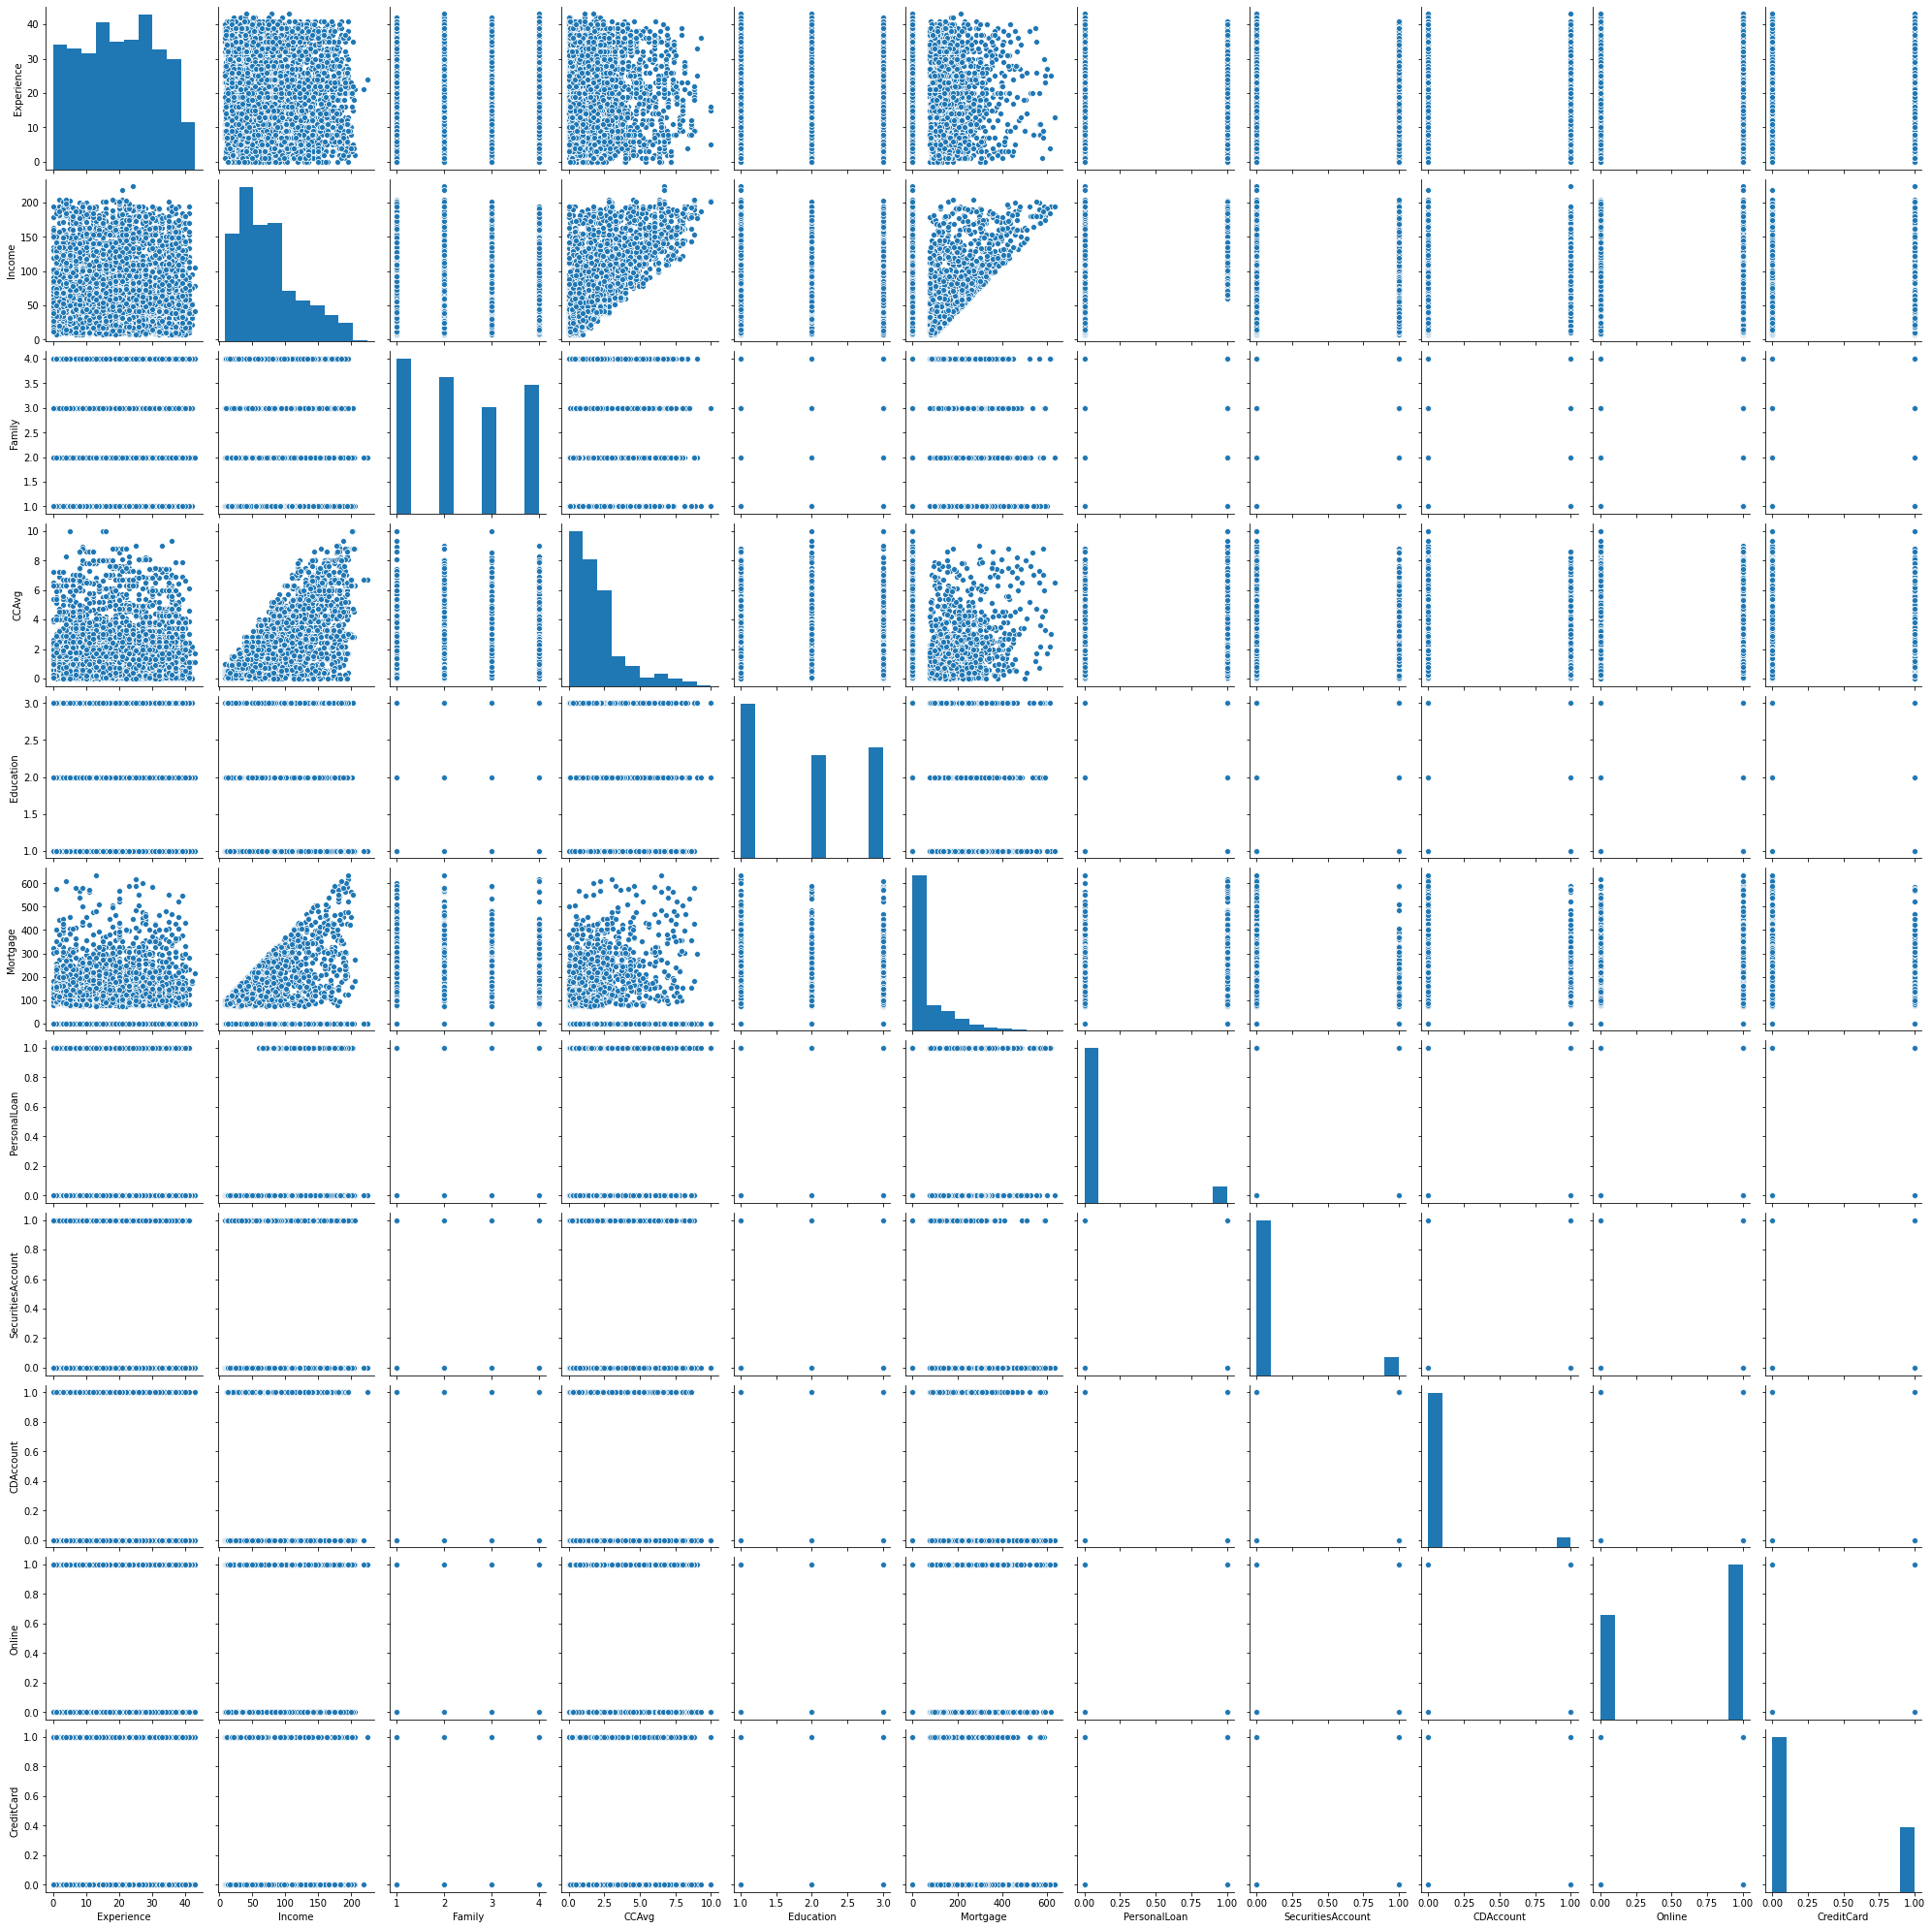

In [ ]:
# UNIVARIATE AND BIVARIATE ANALYSIS.
# THIS SHOWS THE CORELATION BETWEEN EACH AND EVERY COLUMN PAIR OF THE DATASET, SOME OF THE ARE USEFUL.
# EXAMPLE INCOME AND EDUCATION HAVE A LINEAR RELATIONSHIP.

sns.pairplot(df.iloc[:,1:])

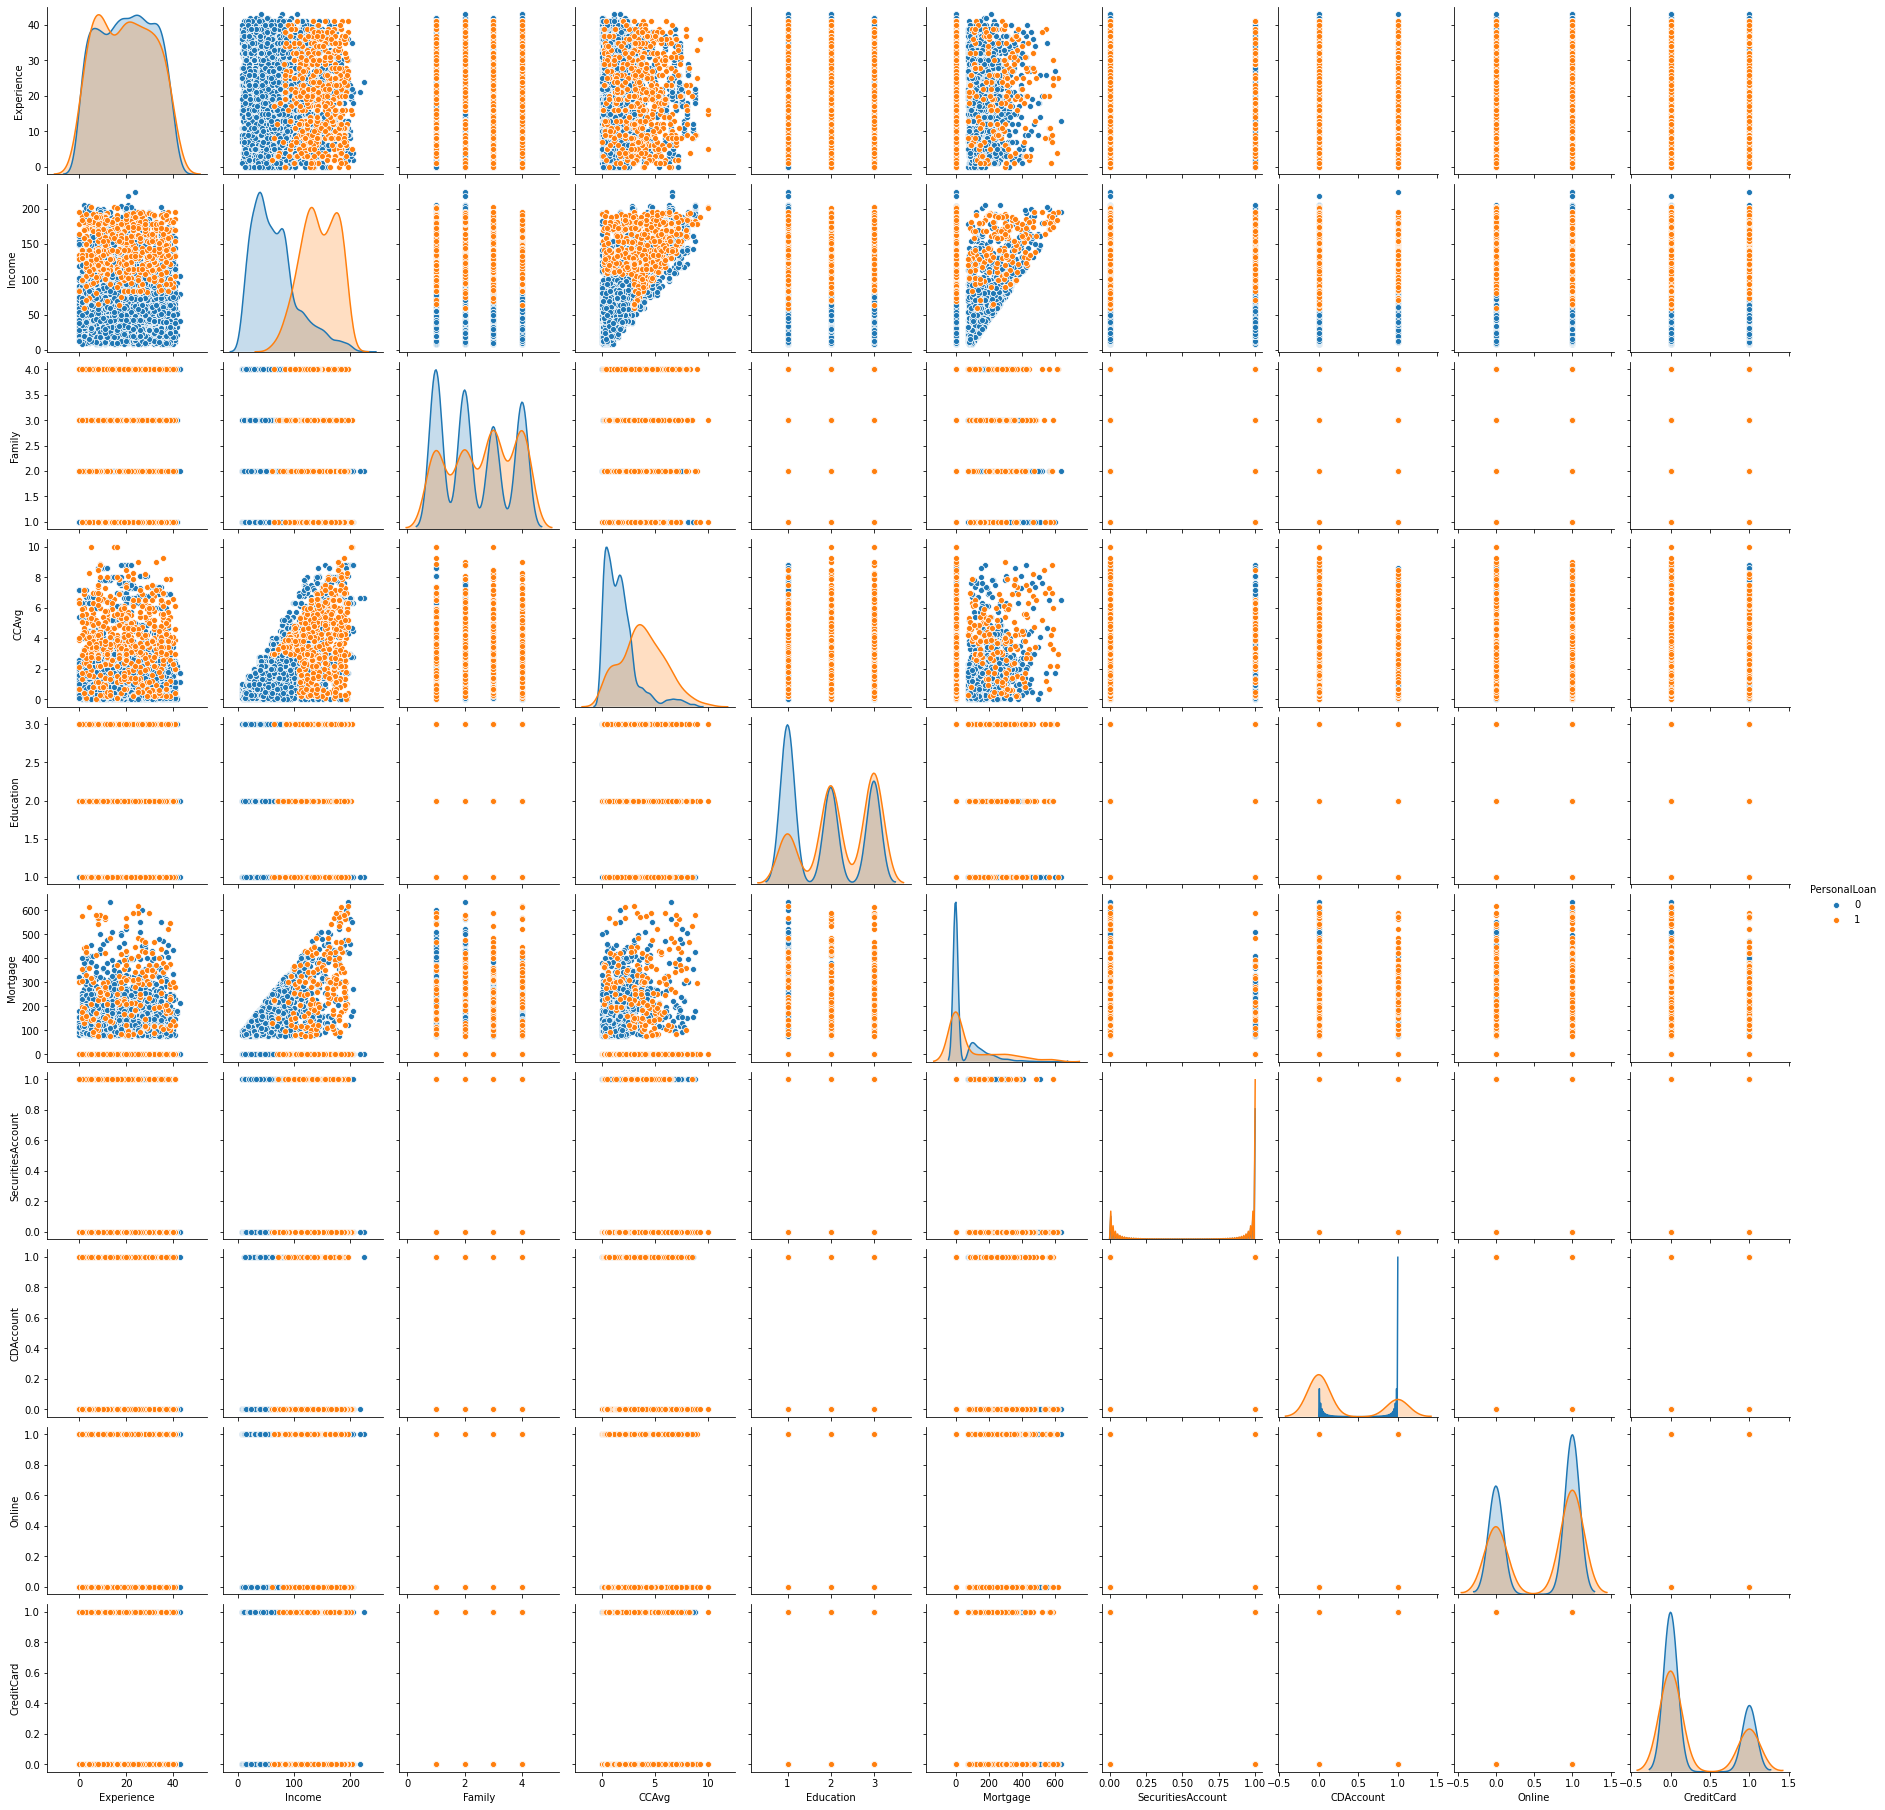

In [ ]:
# THIS OVERLAPS PERSONAL LOAN GRAPHS, SHOWS THE INTERSECTION OF PERSONAL LOAN WITH OTHER COLUMNS
sns.pairplot(df.iloc[:,1:],hue ='PersonalLoan')

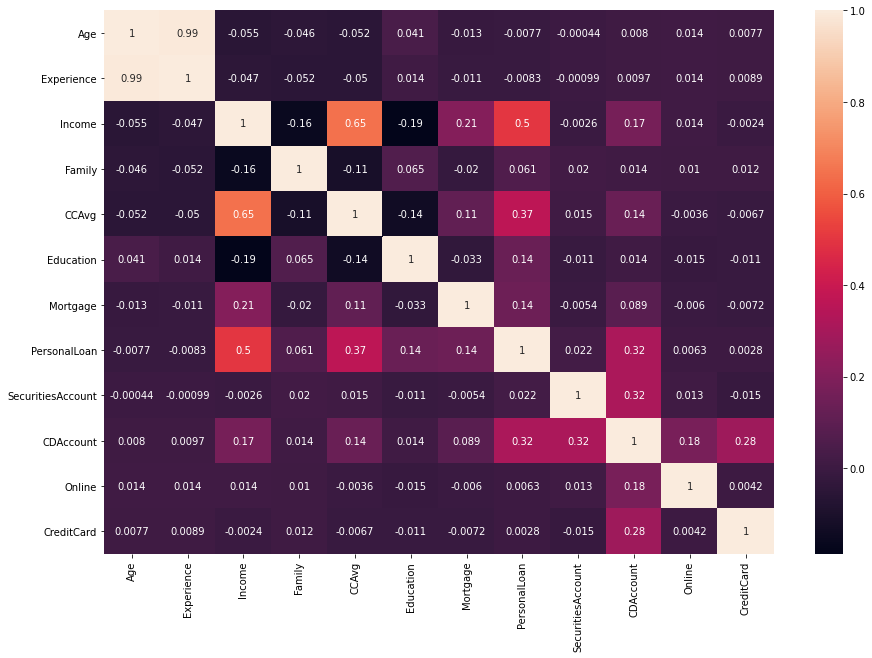

In [ ]:
# Income and CCAvg is moderately correlated
# Age and Experience is highly correlated
# Also there is a moderate correlation b/w Income and Loan

corr=df.corr()
plt.subplots(figsize =(15, 10)) 
sns.heatmap(corr,annot=True)

In [ ]:
# SINCE AGE AND EXPERIENCE ARE HIGHLY CORRELATED, THEREFORE CONSIDERING ONLY ONE OF THEM IN OUR PREDICTIONS

df.drop(['Experience'],inplace=True,axis=1)
df

,Age,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,0,1,0


### **UNIVARIATE ANALYSIS**

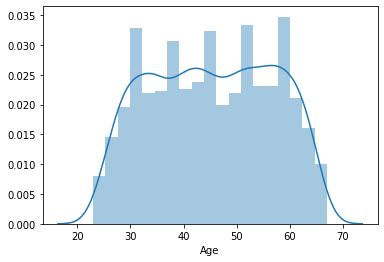

In [ ]:
sns.distplot(df.Age)

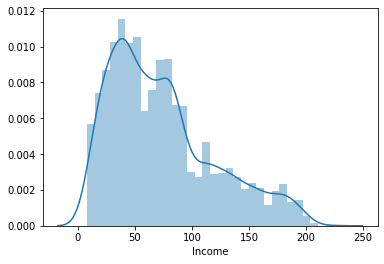

In [ ]:
sns.distplot(df.Income)

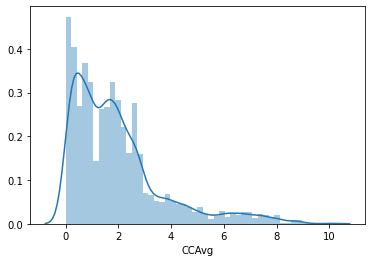

In [ ]:
sns.distplot(df.CCAvg)

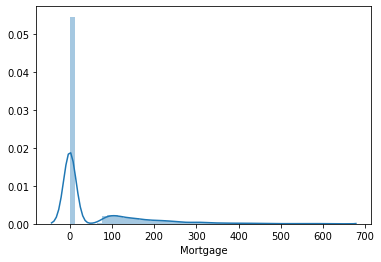

In [ ]:

sns.distplot(df.Mortgage)

CONCLUSION : THE MORTGAGE, INCOME AND CCAVG PLOTS ARE RIGHT SKEWED, WHICH NEEDS TO BE IMPROVED.

### **BIVARIATE AND MULTIVARIATE ANALYSIS**

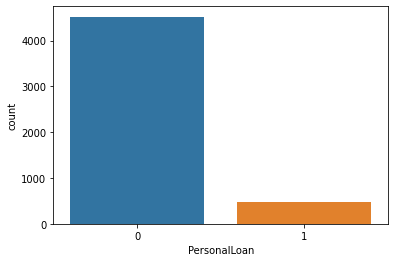

In [ ]:
# SHOW COUNT OF PEOPLE WHO HAVE TAKEN A LOAN and WHO HAVEN'T

sns.countplot(x='PersonalLoan',data=df)

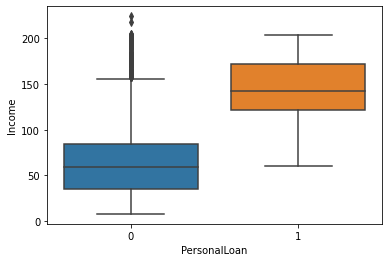

In [ ]:
sns.boxplot(x='PersonalLoan',y='Income',data=df)

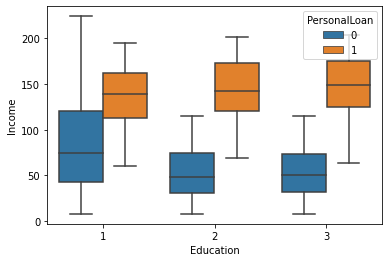

In [ ]:
# NO SPECIFIC CORRELATION BETWEEN AGE AND PERSONAL LOAN, AS ALL AGE GROUPS HAVE PEOPLE WHO HAVE TAKEN LOAN AND WHO HAVE NOT TAKEN LOAN.
# PEOPLE WHO HAVE TAKEN LOANS BELONG TO A PARTICULAR INCOME LEVEL.

sns.boxplot(x='Education',y='Income',hue='PersonalLoan',data=df)

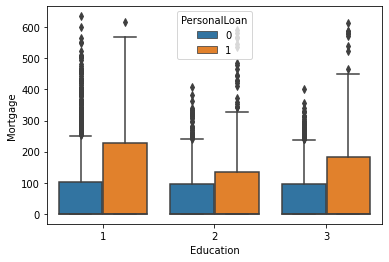

In [ ]:
# CUSTOMERS WITH AND WITHOUT PERSONAL LOANS, BOTH HAVE HIGH MORTGAGES
# THEREFORE, MORTGAGE IS NOT A VERY GOOD VARIABLE FOR PREDICTIONS.

sns.boxplot(x="Education", y='Mortgage', hue="PersonalLoan",data = df)

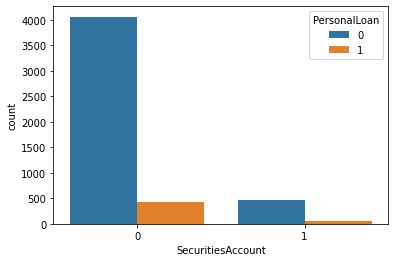

In [ ]:
# MAJORITY OF CUSTOMERS, WHO TAKE LOAN, DO NOT HAVE A SECURITY ACCOUNT

sns.countplot(x='SecuritiesAccount',hue='PersonalLoan',data=df)

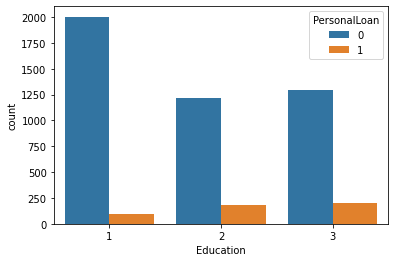

In [ ]:
# MAJORITY OF CUSTOMERS WITH EDUCATION LEVEL 1 DON'T TAKE LOANS
sns.countplot(x='Education',hue='PersonalLoan',data=df)


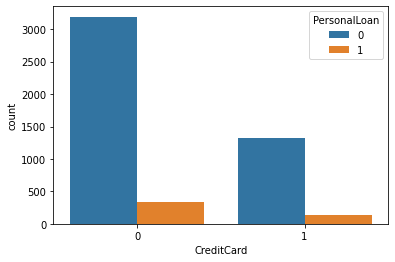

In [ ]:
# CUSTOMERS WITH NO CREDIT CARDS ARE LESS LIKELY TO TAKE LOANS.
sns.countplot(x='CreditCard',hue='PersonalLoan',data=df)

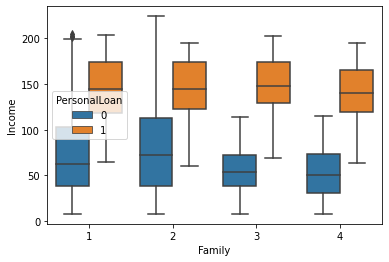

In [ ]:
#FAMILIES WITH HIGHER INCOME ARE MORE LIKELY TO TAKE LOANS.
sns.boxplot(x='Family',y='Income',hue='PersonalLoan',data=df)

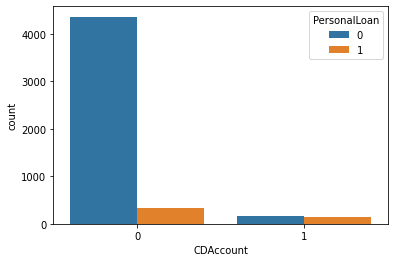

In [ ]:
# CUSTOMERS WITH A CDACCOUNT TEND TO TAKE LOAN.
sns.countplot(x='CDAccount',hue='PersonalLoan',data=df)

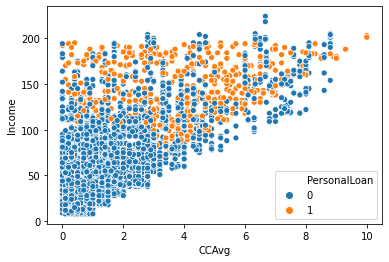

In [ ]:
# With the increase in income, ccavg also increases, and people tend to take more loans.
sns.scatterplot(x='CCAvg',y='Income',hue = 'PersonalLoan',data = df)

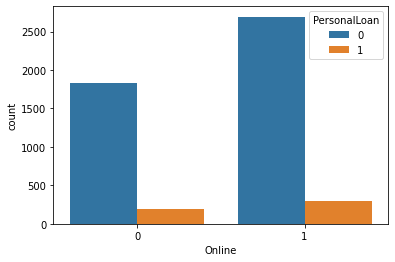

In [ ]:
# NO CORRELATION BETWEEN A CUSTOMER USING INTERNET BANKING FACILITIES AND TAKING A PERSONAL LOAN.
sns.countplot(x='Online',hue='PersonalLoan',data=df)

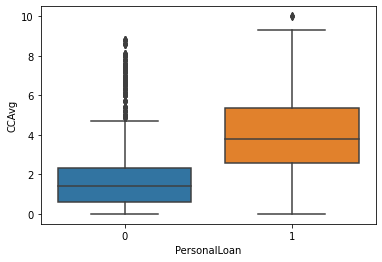

In [ ]:
sns.boxplot(x='PersonalLoan',y='CCAvg',data=df)

# **NECESSARY TRANSFORMATIONS FOR FEATURE VARIABLES**

In [ ]:
y=df['PersonalLoan']
x=df.drop(['PersonalLoan'],axis=1)

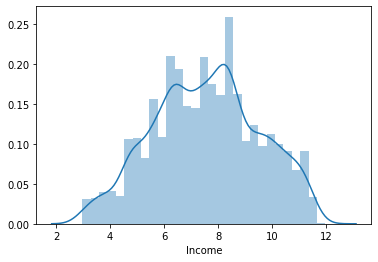

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method = "yeo-johnson", standardize = False)
pt.fit(x['Income'].values.reshape(-1,1))
x['Income'] = pt.transform(x['Income'].values.reshape(-1,1))
sns.distplot(x.Income)


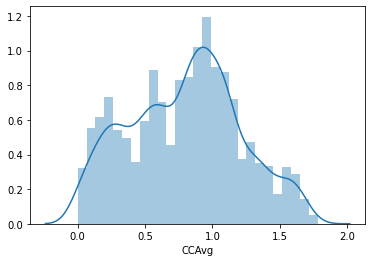

In [ ]:
pt = PowerTransformer(method = "yeo-johnson", standardize = False)
pt.fit(x['CCAvg'].values.reshape(-1,1))
x['CCAvg'] = pt.transform(x['CCAvg'].values.reshape(-1,1))
sns.distplot(x.CCAvg)


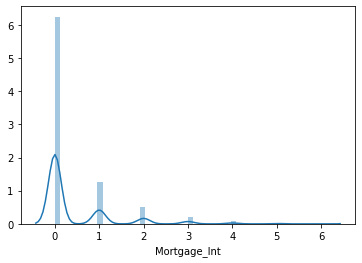

In [ ]:
x['Mortgage_Int'] = pd.cut(x['Mortgage'],
                       bins = [0,100,200,300,400,500,600,700],
                       labels = [0,1,2,3,4,5,6],
                       include_lowest = True)
x.drop('Mortgage',axis = 1, inplace = True)
sns.distplot(x.Mortgage_Int)

CONCLUSION : THE SKEWNESS HAS BEEN REMOVED FROM THE FEATURE VARIABLES AND NOW THEY ARE NORMALLY DISTRIBUTED.

#**STANDARDIZING AND SPLITTING DATA** 

In [ ]:
def standardization(X_train,X_test):
    scaler=preprocessing.StandardScaler()
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)
    return X_train,X_test

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,stratify = y ,random_state=42)
x_train,x_test = standardization(x_train,x_test)

# **PREDICTION MODELS**

### **LOGISTIC REGRESSION MODEL**


In [ ]:
from sklearn.linear_model import LogisticRegression
lrmodel = LogisticRegression()
lrmodel.fit(x_train,y_train)
y_pred = lrmodel.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_train,lrmodel.predict(x_train), normalize=True)
print(" TRAINING Accuracy :",int(score*100),end='%')



 TRAINING Accuracy : 95%

In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred, normalize=True)
print(" TESTING Accuracy :",int(score*100),end='%')


 TESTING Accuracy : 95%

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[1339,   17],
       [  45,   99]])

In [ ]:
  from sklearn import metrics
  
  print("The Classification report is")
  print(metrics.classification_report(y_test, y_pred))
  roc=metrics.roc_auc_score(y_test, y_pred)
  print("ROC value for logistic model is "+ str(roc*100) + "%")

The Classification report is
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1356
           1       0.85      0.69      0.76       144

    accuracy                           0.96      1500
   macro avg       0.91      0.84      0.87      1500
weighted avg       0.96      0.96      0.96      1500

ROC value for logistic model is 83.7481563421829%


### **NAIVE BAYES**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nbmodel = GaussianNB()
nbmodel.fit(x_train,y_train)
y_pred = nbmodel.predict(x_test)


In [ ]:
score = nbmodel.score(x_train,y_train)
print(" TRAINING Accuracy :",int(score*100),end='%')


 TRAINING Accuracy : 90%

In [ ]:
score = nbmodel.score(x_test,y_test)
print(" TESTING Accuracy :",int(score*100),end='%')

 TESTING Accuracy : 90%

In [ ]:
confusion_matrix(y_test,y_pred)

array([[1287,   69],
       [  69,   75]])

In [ ]:
  print("The Classification report is")
  print(metrics.classification_report(y_test, y_pred))
  roc=metrics.roc_auc_score(y_test, y_pred)
  print("ROC value for naive bayes model is "+ str(roc*100) + "%")

The Classification report is
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1356
           1       0.52      0.52      0.52       144

    accuracy                           0.91      1500
   macro avg       0.73      0.73      0.73      1500
weighted avg       0.91      0.91      0.91      1500

ROC value for naive bayes model is 73.49741887905606%


### **KNN MODEL**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier()
knnmodel.fit(x_train,y_train)
y_pred = knnmodel.predict(x_test)

In [ ]:
score = knnmodel.score(x_train,y_train)
print(" TRAINING Accuracy :",int(score*100),end='%')

 TRAINING Accuracy : 96%

In [ ]:
score = knnmodel.score(x_test,y_test)
print(" TESTING Accuracy :",int(score*100),end='%')

 TESTING Accuracy : 95%

In [ ]:
confusion_matrix(y_test,y_pred)

array([[1350,    6],
       [  55,   89]])

In [ ]:
  print("The Classification report is")
  print(metrics.classification_report(y_test, y_pred))
  roc=metrics.roc_auc_score(y_test, y_pred)
  print("ROC value for knn model is "+ str(roc*100) + "%")

The Classification report is
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1356
           1       0.94      0.62      0.74       144

    accuracy                           0.96      1500
   macro avg       0.95      0.81      0.86      1500
weighted avg       0.96      0.96      0.96      1500

ROC value for knn model is 80.68153883972468%


### **DECISION TREE MODEL**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier(max_depth = 5, random_state=1)
dtmodel.fit(x_train,y_train)
y_pred = dtmodel.predict(x_test)

In [ ]:
score = dtmodel.score(x_train,y_train)
print(" TRAINING Accuracy :",int(score*100),end='%')

 TRAINING Accuracy : 98%

In [ ]:
score = dtmodel.score(x_test,y_test)
print(" TESTING Accuracy :",int(score*100),end='%')

 TESTING Accuracy : 98%

In [ ]:
confusion_matrix(y_test,y_pred)

array([[1339,   17],
       [   7,  137]])

In [ ]:
print("The Classification report is")
print(metrics.classification_report(y_test, y_pred))
roc=metrics.roc_auc_score(y_test, y_pred)
print("ROC value for decision tree model is "+ str(roc*100) + "%")

The Classification report is
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.89      0.95      0.92       144

    accuracy                           0.98      1500
   macro avg       0.94      0.97      0.96      1500
weighted avg       0.98      0.98      0.98      1500

ROC value for decision tree model is 96.94260078662734%


### **RANDOM FOREST CLASSIFIER MODEL**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfcmodel = RandomForestClassifier(max_depth=5, random_state=42)
rfcmodel.fit(x_train,y_train)
rfcmodel.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
score = rfcmodel.score(x_train,y_train)
print(" TRAINING Accuracy :",int(score*100),end='%')

 TRAINING Accuracy : 98%

In [ ]:
score = rfcmodel.score(x_test,y_test)
print(" TESTING Accuracy :",int(score*100),end='%')

 TESTING Accuracy : 97%

In [ ]:
confusion_matrix(y_test,y_pred)

array([[1339,   17],
       [   7,  137]])

In [ ]:
print("The Classification report is")
print(metrics.classification_report(y_test, y_pred))
roc=metrics.roc_auc_score(y_test, y_pred)
print("ROC value for random forest classifier model is "+ str(roc*100) + "%")

The Classification report is
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.89      0.95      0.92       144

    accuracy                           0.98      1500
   macro avg       0.94      0.97      0.96      1500
weighted avg       0.98      0.98      0.98      1500

ROC value for random forest classifier model is 96.94260078662734%


### **GRADIENT BOOSTING CLASSIFIER MODEL**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbmodel = GradientBoostingClassifier(random_state=42)
gbmodel.fit(x_train,y_train)
y_pred = gbmodel.predict(x_test)

In [ ]:
score = gbmodel.score(x_train,y_train)
print(" TRAINING Accuracy :",int(score*100),end='%')

 TRAINING Accuracy : 99%

In [ ]:
score = gbmodel.score(x_test,y_test)
print(" TESTING Accuracy :",int(score*100),end='%')

 TESTING Accuracy : 99%

In [ ]:
confusion_matrix(y_test,y_pred)

array([[1348,    8],
       [   7,  137]])

In [ ]:
print("The Classification report is")
print(metrics.classification_report(y_test, y_pred))
roc=metrics.roc_auc_score(y_test, y_pred)
print("ROC value for gradient boosting classifier model is "+ str(roc*100) + "%")

The Classification report is
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.94      0.95      0.95       144

    accuracy                           0.99      1500
   macro avg       0.97      0.97      0.97      1500
weighted avg       0.99      0.99      0.99      1500

ROC value for gradient boosting classifier model is 97.27445919370699%


# **COMPARISON BETWEEN DIFFERENT MODELS**

The models are listed in the increasing order of their performance :-


| Model Name | Trainig Accuracy | Testing Accuracy | Sensitivity* | ROC Value |
| :- | :-: | :-: | :-: | :-: |
| Naive Bayes | 90 | 90 | 52 | 73 | 
| KNN | 96 | 96 | 63 | 81 | 
| Logistic Regression | 95 | 95 | 69 | 82 | 
| Decision Tree | 98 | 98 | 95 | 96 | 
| Random Forest  | 98 | 98 | 94 | 96 | 
| Gradient Boosting | 99 | 98 | 94 | 96 | 




**Sensitivity represents when the customer has actually taken the loan, and how often the model predicts that the customer will take a loan.* 



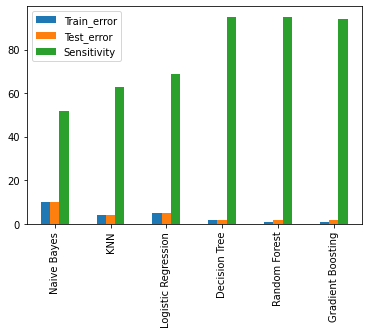

In [ ]:
sensitivity = [52,63,69,95,95,94]
train_error = [10,4,5,2,1,1]
test_error = [10,4,5,2,2,2]
ROC = [73,81,82,96,96,96]
col = {'Train_error' : train_error, 'Test_error' : test_error, 'Sensitivity' : sensitivity}
models = ['Naive Bayes','KNN','Logistic Regression','Decision Tree','Random Forest','Gradient Boosting']
data =  pd.DataFrame(data = col, index = models)
data.plot(kind='bar')

Decision Tree, Random Forest and Gradient Boosting Classifier are close in terms of Accuracy, but the best predictions here, are made by Decision Tree model.

### **Therefore, Decision Tree Model is best for this data !**

# **BUSINESS UNDERSATNDING**

Here are some key takeaways from this model :


*   Income plays a major role in predicting whether a customer will take loan or not. Usually people with Income between 120K - 170K dollars, tend to take loans.
*   Customers with education level 2 and 3 are more likely to take loans as compared to the customers with education level 1.
*   Customers with credit cards are also more likely to take a loan.
*   Customers with certificate of deposit accounts are more likely to take a loan.
*   Customers without securites account, are more likely to take a loan.
*   Customers with average credit card spending between 3k - 5k dollars per month are more likely to take a loan. 
*   The Decision Tree model predicts 137 customers out of 144 who have actually taken the loan. Therefore this will help us to predict customers who are willing to take a loan from the bank. Also, the Random Forest Classifier Model and Gradient Boosting Classifier Model work good enough !








